# Image Features
We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

In [1]:
import random
import numpy as np
from dl4cv.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk. However, we don't apply our previous preprocessing steps, as we want to extract custom features later on.

Train data shape:  (48000, 32, 32, 3)
Train labels shape:  (48000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


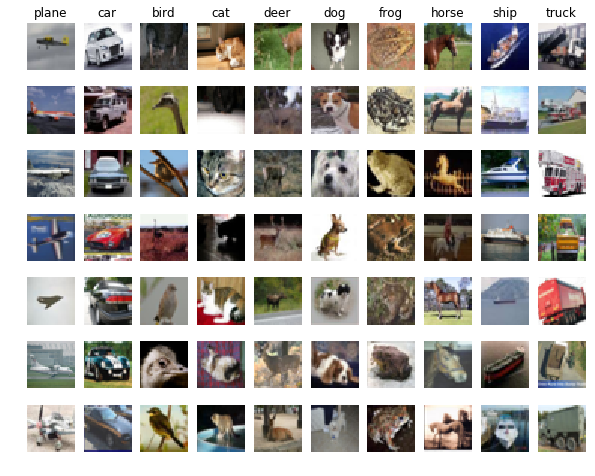

In [2]:
from dl4cv.data_utils import load_CIFAR10
from dl4cv.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for feature extraction and training.
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

# visualize raw data
visualize_cifar10(X_raw, y_raw)

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from dl4cv.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 48000 images
Done extracting features for 2000 / 48000 images
Done extracting features for 3000 / 48000 images
Done extracting features for 4000 / 48000 images
Done extracting features for 5000 / 48000 images
Done extracting features for 6000 / 48000 images
Done extracting features for 7000 / 48000 images
Done extracting features for 8000 / 48000 images
Done extracting features for 9000 / 48000 images
Done extracting features for 10000 / 48000 images
Done extracting features for 11000 / 48000 images
Done extracting features for 12000 / 48000 images
Done extracting features for 13000 / 48000 images
Done extracting features for 14000 / 48000 images
Done extracting features for 15000 / 48000 images
Done extracting features for 16000 / 48000 images
Done extracting features for 17000 / 48000 images
Done extracting features for 18000 / 48000 images
Done extracting features for 19000 / 48000 images
Done extracting features for 20000 / 48000 images
Done extr

## Train a Softmax classifier on features
Using the multiclass Softmax code developed earlier in the assignment, train a Softmax classifier on top of the features extracted above; this should achieve better results than training the classifier directly on top of raw pixels.

In [77]:
# Use the validation set to tune the learning rate and regularization strength

from dl4cv.classifiers.linear_classifier import Softmax



pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the Softmax; save#
# the best trained classifer in best_softmax. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
learning_rates = [9e-2, 5e-4, 1e-3, 1]
regularization_strengths = [5e5, 3e7, 1e8]

results = {}
best_val = -1
best_softmax = None
for lr in learning_rates:
    for reg in regularization_strengths:
        softmax=Softmax()
        softmax.train(X_train_feats, y_train, lr, reg, 8000, 200, True)
        y_pred_train_feats=softmax.predict(X_train_feats)
        y_pred_val_feats=softmax.predict(X_val_feats)
       
        train_accuracy=np.mean(y_pred_train_feats == y_train)
        val_accuracy=np.mean(y_pred_val_feats == y_val)
        if(val_accuracy>best_val):
            best_val=val_accuracy    
            best_softmax=softmax
        results[(lr,reg)]=(train_accuracy, val_accuracy)
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during validation: %f' % best_val
################################################################################
#                              END OF YOUR CODE                                #
################################################################################



iteration 0 / 8000: loss 800.143806
iteration 100 / 8000: loss 2617568.728651
iteration 200 / 8000: loss 4152681.667915
iteration 300 / 8000: loss 5212796.277592
iteration 400 / 8000: loss 6107488.974368
iteration 500 / 8000: loss 6688914.176757
iteration 600 / 8000: loss 7148063.186102
iteration 700 / 8000: loss 7545102.506638
iteration 800 / 8000: loss 7855518.329606
iteration 900 / 8000: loss 8070857.567321
iteration 1000 / 8000: loss 8299664.719582
iteration 1100 / 8000: loss 8680313.064369
iteration 1200 / 8000: loss 8852798.068878
iteration 1300 / 8000: loss 8895765.715628
iteration 1400 / 8000: loss 9048659.332435
iteration 1500 / 8000: loss 9192029.158497
iteration 1600 / 8000: loss 9253930.466435
iteration 1700 / 8000: loss 9285257.835147
iteration 1800 / 8000: loss 9363936.445402
iteration 1900 / 8000: loss 9428394.028772
iteration 2000 / 8000: loss 9503984.970037
iteration 2100 / 8000: loss 9615321.417214
iteration 2200 / 8000: loss 9666399.871904
iteration 2300 / 8000: loss

iteration 2700 / 8000: loss 1976908947.492306
iteration 2800 / 8000: loss 1984406055.631121
iteration 2900 / 8000: loss 1978978284.217625
iteration 3000 / 8000: loss 1980995429.448110
iteration 3100 / 8000: loss 1972734196.249681
iteration 3200 / 8000: loss 1992094555.620769
iteration 3300 / 8000: loss 1995240749.666888
iteration 3400 / 8000: loss 1986719308.551638
iteration 3500 / 8000: loss 1996980158.350297
iteration 3600 / 8000: loss 1999091687.841114
iteration 3700 / 8000: loss 1992905641.851500
iteration 3800 / 8000: loss 2012201537.627052
iteration 3900 / 8000: loss 1999651841.794335
iteration 4000 / 8000: loss 2015819218.713485
iteration 4100 / 8000: loss 2027136487.791066
iteration 4200 / 8000: loss 2013542886.197023
iteration 4300 / 8000: loss 2029027501.578741
iteration 4400 / 8000: loss 2013051465.329290
iteration 4500 / 8000: loss 2004064299.432255
iteration 4600 / 8000: loss 2006278299.680759
iteration 4700 / 8000: loss 2009052280.282236
iteration 4800 / 8000: loss 202533

iteration 5900 / 8000: loss 50139411.223343
iteration 6000 / 8000: loss 51107709.266877
iteration 6100 / 8000: loss 52044357.189561
iteration 6200 / 8000: loss 52991382.861550
iteration 6300 / 8000: loss 53936603.491900
iteration 6400 / 8000: loss 54886458.804831
iteration 6500 / 8000: loss 55810992.527406
iteration 6600 / 8000: loss 56734239.815725
iteration 6700 / 8000: loss 57662952.486253
iteration 6800 / 8000: loss 58602318.881159
iteration 6900 / 8000: loss 59529447.086435
iteration 7000 / 8000: loss 60454769.415395
iteration 7100 / 8000: loss 61370820.508129
iteration 7200 / 8000: loss 62249457.908113
iteration 7300 / 8000: loss 63139954.473807
iteration 7400 / 8000: loss 64037377.671156
iteration 7500 / 8000: loss 64938405.552900
iteration 7600 / 8000: loss 65822780.954657
iteration 7700 / 8000: loss 66730933.394505
iteration 7800 / 8000: loss 67612485.971654
iteration 7900 / 8000: loss 68502752.882264
iteration 0 / 8000: loss 164136.576586
iteration 100 / 8000: loss 324500.477

iteration 1100 / 8000: loss 14011426.794856
iteration 1200 / 8000: loss 15915313.453314
iteration 1300 / 8000: loss 17809749.504212
iteration 1400 / 8000: loss 19757361.924466
iteration 1500 / 8000: loss 21730247.687841
iteration 1600 / 8000: loss 23701751.297466
iteration 1700 / 8000: loss 25691242.603989
iteration 1800 / 8000: loss 27657361.851172
iteration 1900 / 8000: loss 29637814.030022
iteration 2000 / 8000: loss 31591090.143633
iteration 2100 / 8000: loss 33550250.243731
iteration 2200 / 8000: loss 35544455.867872
iteration 2300 / 8000: loss 37521971.852211
iteration 2400 / 8000: loss 39499391.309844
iteration 2500 / 8000: loss 41474417.051601
iteration 2600 / 8000: loss 43396811.020152
iteration 2700 / 8000: loss 45345417.560603
iteration 2800 / 8000: loss 47284300.110067
iteration 2900 / 8000: loss 49194626.197654
iteration 3000 / 8000: loss 51137858.276100
iteration 3100 / 8000: loss 53052287.739452
iteration 3200 / 8000: loss 54908937.665132
iteration 3300 / 8000: loss 5676

iteration 3900 / 8000: loss 13908516.076260
iteration 4000 / 8000: loss 13787566.034054
iteration 4100 / 8000: loss 14059502.735845
iteration 4200 / 8000: loss 14000182.001619
iteration 4300 / 8000: loss 13375967.919365
iteration 4400 / 8000: loss 13548366.949591
iteration 4500 / 8000: loss 13635565.575488
iteration 4600 / 8000: loss 13561611.873001
iteration 4700 / 8000: loss 14040731.037721
iteration 4800 / 8000: loss 14296010.504813
iteration 4900 / 8000: loss 13854923.913329
iteration 5000 / 8000: loss 13699316.022983
iteration 5100 / 8000: loss 13459902.219148
iteration 5200 / 8000: loss 13728256.197303
iteration 5300 / 8000: loss 13493401.243019
iteration 5400 / 8000: loss 14033429.298579
iteration 5500 / 8000: loss 14284351.967519
iteration 5600 / 8000: loss 13907030.606046
iteration 5700 / 8000: loss 14080245.671893
iteration 5800 / 8000: loss 14452311.944654
iteration 5900 / 8000: loss 13851180.682162
iteration 6000 / 8000: loss 13787540.456883
iteration 6100 / 8000: loss 1439

iteration 6300 / 8000: loss 2785399518.647279
iteration 6400 / 8000: loss 2645012812.090868
iteration 6500 / 8000: loss 2758751141.337802
iteration 6600 / 8000: loss 2768546664.615936
iteration 6700 / 8000: loss 2784677575.443023
iteration 6800 / 8000: loss 2698294115.505494
iteration 6900 / 8000: loss 2749874058.294925
iteration 7000 / 8000: loss 2807137801.799205
iteration 7100 / 8000: loss 2889992971.244885
iteration 7200 / 8000: loss 2808601786.811137
iteration 7300 / 8000: loss 2773226108.904545
iteration 7400 / 8000: loss 2791152851.162452
iteration 7500 / 8000: loss 2804952641.321643
iteration 7600 / 8000: loss 2883510057.561354
iteration 7700 / 8000: loss 2770762622.335327
iteration 7800 / 8000: loss 2697431426.125734
iteration 7900 / 8000: loss 2775009165.759070
lr 5.000000e-04 reg 5.000000e+05 train accuracy: 0.475896 val accuracy: 0.481000
lr 5.000000e-04 reg 3.000000e+07 train accuracy: 0.475729 val accuracy: 0.481000
lr 5.000000e-04 reg 1.000000e+08 train accuracy: 0.47570

In [78]:
# Evaluate your trained classifier on the test set
y_test_pred = best_softmax.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.503


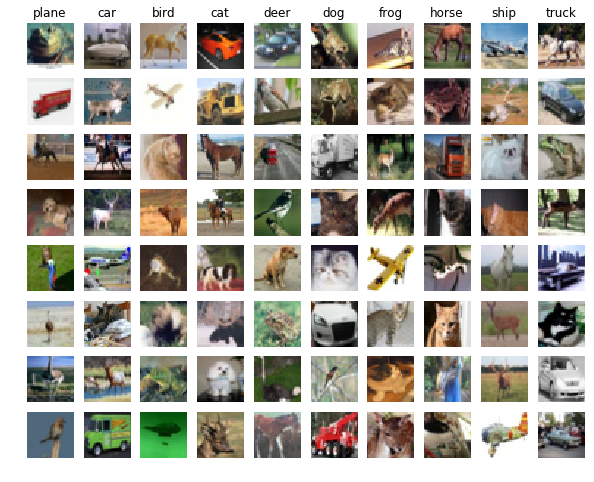

In [46]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    if len(idxs) > 0:
        idxs = np.random.choice(idxs, min(examples_per_class, len(idxs)), replace=False)
    else:
        idxs = []
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

**Your answer:** *Fill this in*

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set.

Note that in the neural net class we have used explicit biases. In the preprocessing of this exercise we have also added a bias dimension to the input, such that we don't have to consider an explicit bias in the linear classifier above. The neural net therefore has an additional parameter in the first layer (the additional bias term), which after all does not matter, as both bias terms can be learned. So just don't get confused by this.

In [ ]:
print X_train_feats.shape

In [81]:
from dl4cv.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
input_size = input_dim
hidden_size = hidden_dim 

results = {}
best_val = -1
best_net = None

learning_rates = [1e-1, 5e-1, 1]
regularization_strengths = [1e-3, 5e-3]

for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=1500, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=True)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc
# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print 'lr %e reg %e val accuracy: %f' % (
                lr, reg,  val_acc)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302571
iteration 200 / 1500: loss 2.161468
iteration 300 / 1500: loss 1.835420
iteration 400 / 1500: loss 1.587549
iteration 500 / 1500: loss 1.475166
iteration 600 / 1500: loss 1.337468
iteration 700 / 1500: loss 1.351332
iteration 800 / 1500: loss 1.395742
iteration 900 / 1500: loss 1.400840
iteration 1000 / 1500: loss 1.264118
iteration 1100 / 1500: loss 1.356843
iteration 1200 / 1500: loss 1.348665
iteration 1300 / 1500: loss 1.475076
iteration 1400 / 1500: loss 1.377384
iteration 0 / 1500: loss 2.302587
iteration 100 / 1500: loss 2.302611
iteration 200 / 1500: loss 2.127772
iteration 300 / 1500: loss 1.762200
iteration 400 / 1500: loss 1.675594
iteration 500 / 1500: loss 1.543352
iteration 600 / 1500: loss 1.530184
iteration 700 / 1500: loss 1.513475
iteration 800 / 1500: loss 1.388440
iteration 900 / 1500: loss 1.446243
iteration 1000 / 1500: loss 1.367324
iteration 1100 / 1500: loss 1.425599
iteration 1200 / 1500: lo

In [82]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.563


## Save the model

When you are satisfied with your training, save the model for submission.

In [83]:
from dl4cv.model_savers import save_feature_neural_net
save_feature_neural_net(best_net)

## Scoring function
We will score the model you have just saved based on the classification accuracy on our test dataset. The scoring function should represent the difficulty of obtaining a good test accuracy and should therefore give 0 points for worse results than random guessing, should be linear in a first regime and exponential beyond that. The onset of exponential growth depends on the problem. In that region you get twice as many points for an additional 10% accuracy.

For this problem we specifically use the following scoring function:

$$f(x) = \left\{
	\begin{array}{ll}
		0  & \mbox{if } x \leq 0.1 \\
		100x & \mbox{if } 0.1 < x \leq 0.59 \\
        \left(\frac{59}{\exp(0.59 \ln(2)/0.1)}\right) \exp(x \ln(2)/0.1) & \mbox{if } 0.59 < x \leq 1
	\end{array}
\right.$$

The function can be plotted in the following cell.

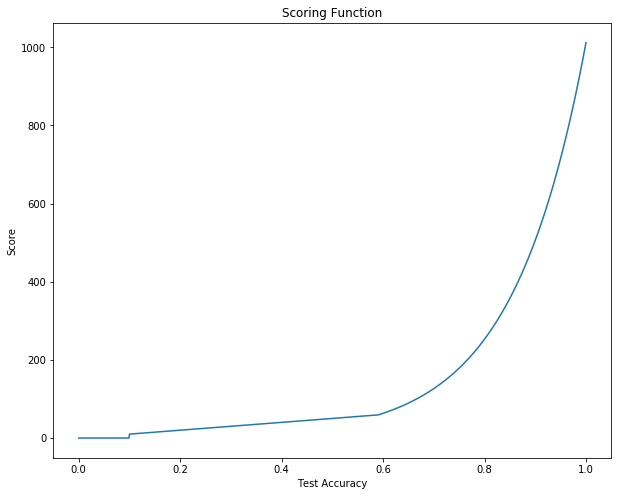

In [84]:
from dl4cv.data_utils import scoring_function

x = np.linspace(0, 1, num=1000)
plt.plot(x, scoring_function(x, lin_exp_boundary=0.59, doubling_rate=0.1))
plt.title('Scoring Function')
plt.xlabel('Test Accuracy')
plt.ylabel('Score')